In [ ]:
import pandas as pd
df= pd.read_csv("/content/cleaned_sales_dataset.csv")
df.shape

(300, 18)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice_ID          300 non-null    object 
 1   Invoice_Date        300 non-null    object 
 2   Customer_ID         268 non-null    object 
 3   Customer_DOB        300 non-null    object 
 4   Product_ID          300 non-null    object 
 5   Product_Category    300 non-null    object 
 6   Quantity            300 non-null    int64  
 7   Unit_Price          300 non-null    float64
 8   Total_Amount        266 non-null    float64
 9   Payment_Mode        300 non-null    object 
 10  Country             300 non-null    object 
 11  Order_Status        300 non-null    object 
 12  Invoice_Date_Clean  300 non-null    object 
 13  Country_Clean       300 non-null    object 
 14  Payment_Mode_Clean  300 non-null    object 
 15  Total_Amount_Clean  300 non-null    float64
 16  Customer

In [ ]:
df.describe()

,Quantity,Unit_Price,Total_Amount,Total_Amount_Clean,Customer_Age
count,300.000000,300.00000,266.000000,300.000000,300.000000
mean,2.723333,765.55480,2708.309023,2087.297667,40.800000
std,1.680138,431.07022,1393.349319,1904.889424,8.515577
min,1.000000,50.27000,129.830000,59.730000,26.000000
25%,1.000000,385.96000,1540.572500,719.572500,33.000000
50%,2.000000,751.01500,2779.220000,1413.980000,42.000000
75%,4.000000,1150.94750,3932.427500,2941.830000,48.000000
max,8.000000,1495.76000,4998.600000,11738.480000,54.000000


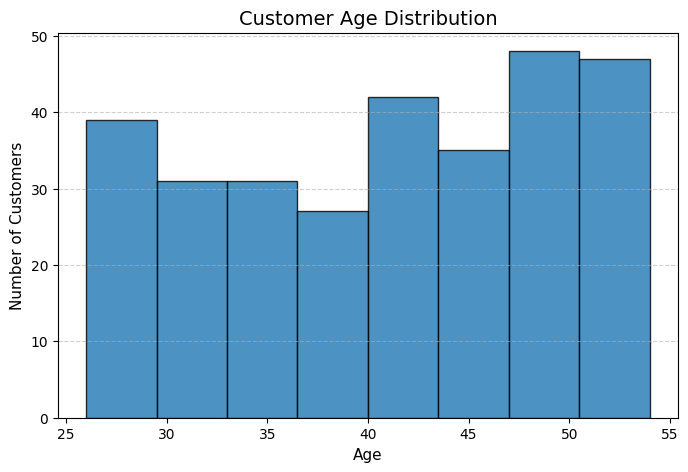

In [ ]:
from matplotlib.typing import LineStyleType
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(
    df['Customer_Age'],
    bins=8,
    edgecolor='black',
    alpha=0.8
)
plt.title("Customer Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=11)
plt.ylabel("Number of Customers", fontsize=11)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()

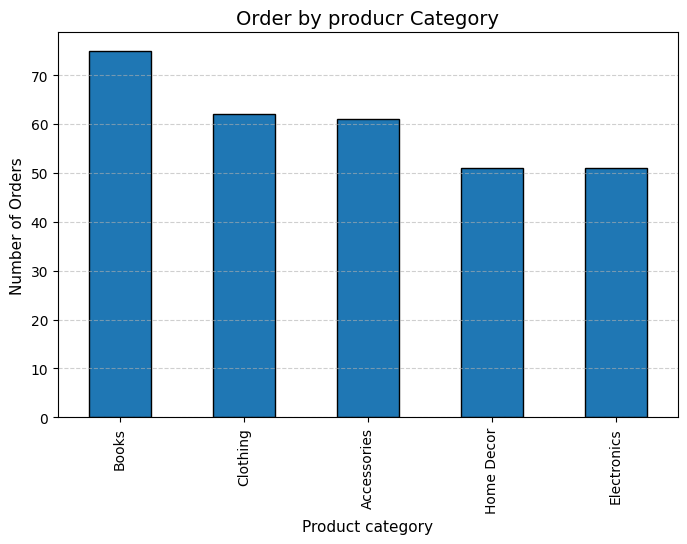

In [ ]:
plt.figure(figsize=(8,5))
df['Product_Category'].value_counts().plot(
    kind='bar',
    edgecolor= 'black'
)
plt.title("Order by producr Category", fontsize=14)
plt.xlabel("Product category", fontsize=11)
plt.ylabel("Number of Orders",fontsize=11)
plt.grid(axis='y',linestyle='--', alpha=0.60)
plt.show()

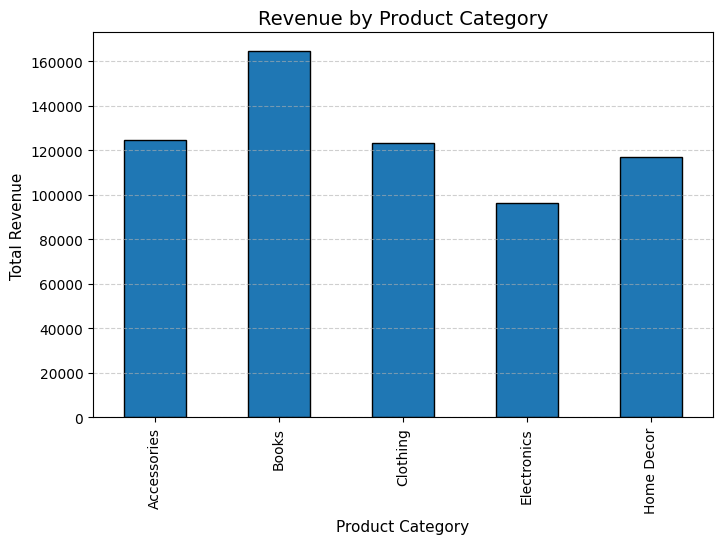

In [ ]:
plt.figure(figsize=(8,5))
df.groupby('Product_Category')['Total_Amount_Clean'].sum().plot(
    kind='bar',
    edgecolor='black'
)
plt.title("Revenue by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=11)
plt.ylabel("Total Revenue", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

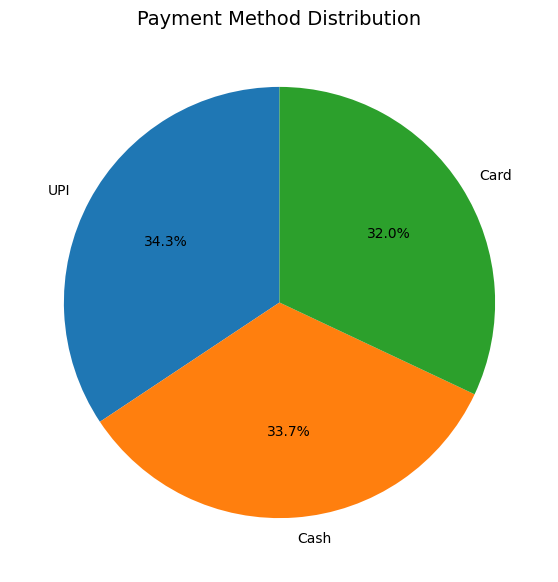

In [ ]:
plt.figure(figsize=(7,7))

df['Payment_Mode_Clean'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Payment Method Distribution", fontsize=14)
plt.ylabel("")
plt.show()


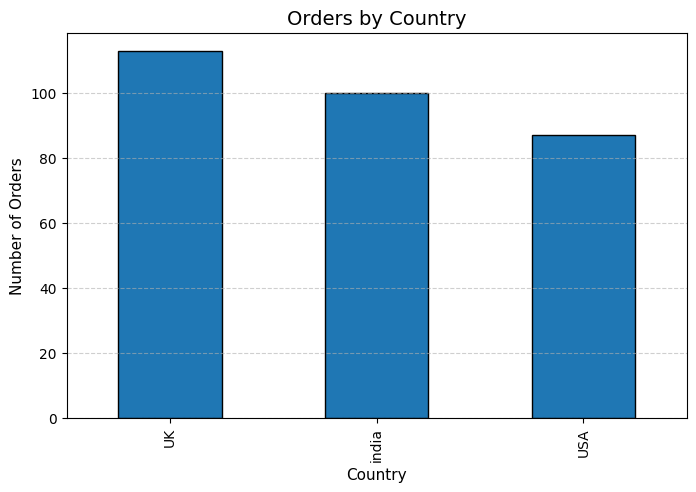

In [ ]:
plt.figure(figsize=(8,5))

df['Country_Clean'].value_counts().plot(
    kind='bar',
    edgecolor='black'
)

plt.title("Orders by Country", fontsize=14)
plt.xlabel("Country", fontsize=11)
plt.ylabel("Number of Orders", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


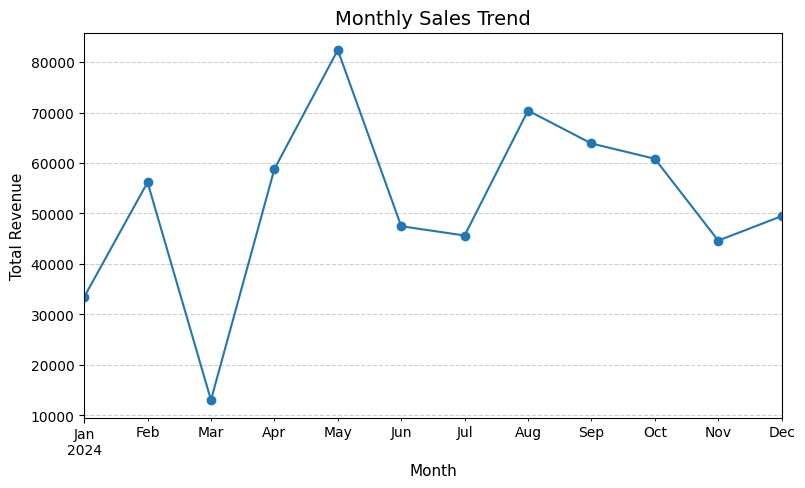

In [ ]:
df['Invoice_Date_Clean'] = pd.to_datetime(df['Invoice_Date_Clean'])

monthly_sales = (
    df.groupby(df['Invoice_Date_Clean'].dt.to_period('M'))['Total_Amount_Clean']
    .sum()
)

plt.figure(figsize=(9,5))
monthly_sales.plot(marker='o')

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=11)
plt.ylabel("Total Revenue", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
